# Project 1 - Movie Review Aggregators

### Context:

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!

## 0. Read in the Data

In [4]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv('../Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [6]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

How many movies are in this data set?

In [10]:
movies.shape

(16638, 9)

Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [13]:
movies.in_theaters_date = pd.to_datetime(movies.in_theaters_date)
movies.in_theaters_date.dt.year

0        2010.0
1        2010.0
2        1979.0
3        1957.0
4        1954.0
          ...  
16633    1981.0
16634    2016.0
16635    1964.0
16636    1964.0
16637    1979.0
Name: in_theaters_date, Length: 16638, dtype: float64

In [15]:
movies.dtypes

movie_title                   object
rating                        object
genre                         object
in_theaters_date      datetime64[ns]
runtime_in_minutes           float64
tomatometer_rating             int64
tomatometer_count              int64
audience_rating              float64
audience_count               float64
dtype: object

In [17]:
movies = movies[movies.in_theaters_date.dt.year >= 2010]
movies.head(3)
movies.shape

(6053, 9)

Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [20]:
movies.sort_values('tomatometer_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
3093,"Batman: The Dark Knight Returns, Part 1",PG-13,"Action & Adventure, Animation",2012-01-01,134.0,100,5,93.0,8482.0
8500,King Georges,NR,Documentary,2016-02-26,78.0,100,9,54.0,240.0
8495,King Charles III,NR,Drama,2017-05-14,88.0,100,9,48.0,65.0
8477,Killing for Love (Das Versprechen),NR,"Art House & International, Documentary",2017-12-15,124.0,100,9,82.0,201.0
8461,Kill Zone 2 (Saat po long 2),NR,"Action & Adventure, Art House & International,...",2016-05-13,120.0,100,22,63.0,544.0


In [22]:
movies.sort_values('audience_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
9051,Little Monsters,R,"Comedy, Horror",2019-10-08,94.0,83,94,100.0,9.0
7137,Haunt,R,"Horror, Mystery & Suspense",2019-09-13,92.0,68,38,100.0,7.0
16438,Wonders of the Sea,NR,Documentary,2019-01-17,82.0,76,17,100.0,13.0
14580,The Most Dangerous Year,NR,Documentary,2019-04-12,90.0,91,11,100.0,40.0


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [25]:
movies_popular = movies[movies.audience_count >= 100000]
movies_popular.shape

(316, 9)

Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [28]:
movies_popular.sort_values('tomatometer_rating', ascending=False)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0
...,...,...,...,...,...,...,...,...,...
5945,Fantastic Four,PG-13,Action & Adventure,2015-08-07,100.0,9,252,18.0,137562.0
6942,Grown Ups 2,PG-13,Comedy,2013-07-12,101.0,7,112,53.0,180859.0
8714,The Last Airbender,PG,"Action & Adventure, Kids & Family, Science Fic...",2010-07-01,103.0,5,189,30.0,321915.0
3387,"Big Mommas: Like Father, Like Son",PG-13,Comedy,2011-02-18,107.0,5,60,58.0,132093.0


In [30]:
movies_popular.sort_values('audience_rating', ascending=False)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0
14549,The Martian,PG-13,Science Fiction & Fantasy,2015-10-02,164.0,91,361,91.0,131093.0
...,...,...,...,...,...,...,...,...,...
8855,Legion,R,"Action & Adventure, Horror, Mystery & Suspense",2010-01-22,100.0,19,104,31.0,312684.0
8714,The Last Airbender,PG,"Action & Adventure, Kids & Family, Science Fic...",2010-07-01,103.0,5,189,30.0,321915.0
4275,Chernobyl Diaries,R,"Drama, Horror",2012-05-25,86.0,19,89,28.0,141874.0
8261,Jonah Hex,PG-13,"Action & Adventure, Drama, Horror, Western",2010-06-18,84.0,12,150,20.0,170670.0


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [33]:
movies_popular[movies_popular.rating == 'PG'].shape

(51, 9)

In [35]:
movies_popular[movies_popular.rating == 'PG-13'].shape

(160, 9)

In [37]:
movies_popular.rating.value_counts()

rating
PG-13    160
R        100
PG        51
G          5
Name: count, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [40]:
movies_popular.groupby('rating')['audience_rating'].mean()

rating
G        66.200000
PG       66.823529
PG-13    67.293750
R        63.010000
Name: audience_rating, dtype: float64

## 2. Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [44]:
movies_popular.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0


In [46]:
import numpy as np

# this will create an 'Animation' column at the right of the df
movies_popular['Animation'] = np.where(movies_popular.genre.str.contains('Animation'),1,0)

C:\Users\tudor\AppData\Local\Temp\ipykernel_20060\1923965592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_popular['Animation'] = np.where(movies_popular.genre.str.contains('Animation'),1,0)


In [48]:
# actually copy data into a new df, not just make a view into the old df
movies_popular = movies[movies.audience_count > 100000].copy()

In [50]:
movies_popular['Action & Adventure'] = np.where(movies_popular.genre.str.contains('Action & Adventure'),1,0)

In [52]:
movies_popular['Comedy'] = np.where(movies_popular.genre.str.contains('Comedy'),1,0)

In [54]:
movies_popular.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Comedy
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,1,1
248,Tron Legacy,PG,"Action & Adventure, Science Fiction & Fantasy",2010-12-17,125.0,51,239,63.0,171385.0,1,0
265,The Last Song,PG,"Drama, Kids & Family, Romance",2010-03-31,107.0,20,118,66.0,160777.0,0,0
274,Repo Men,R,"Action & Adventure, Science Fiction & Fantasy",2010-03-19,119.0,22,151,41.0,100453.0,1,0
284,Predators,R,"Action & Adventure, Horror, Science Fiction & ...",2010-07-09,107.0,65,198,52.0,159760.0,1,0


Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [57]:
movies_popular.groupby('rating')[['Animation', 'Action & Adventure', 'Comedy']].sum()

KeyError: "Columns not found: 'Animation'"

Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

In [ ]:
movies_popular.groupby('Animation')[['tomatometer_rating', 'audience_rating']].mean()

In [60]:
movies_popular.groupby('Action & Adventure')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Action & Adventure,,
0,59.111888,65.391608
1,60.734104,66.219653


In [62]:
movies_popular.groupby('Comedy')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Comedy,,
0,62.169811,67.353774
1,55.576923,62.769231


## 3. Visualize the Data

Create a pair plot from the popular movies DataFrame.

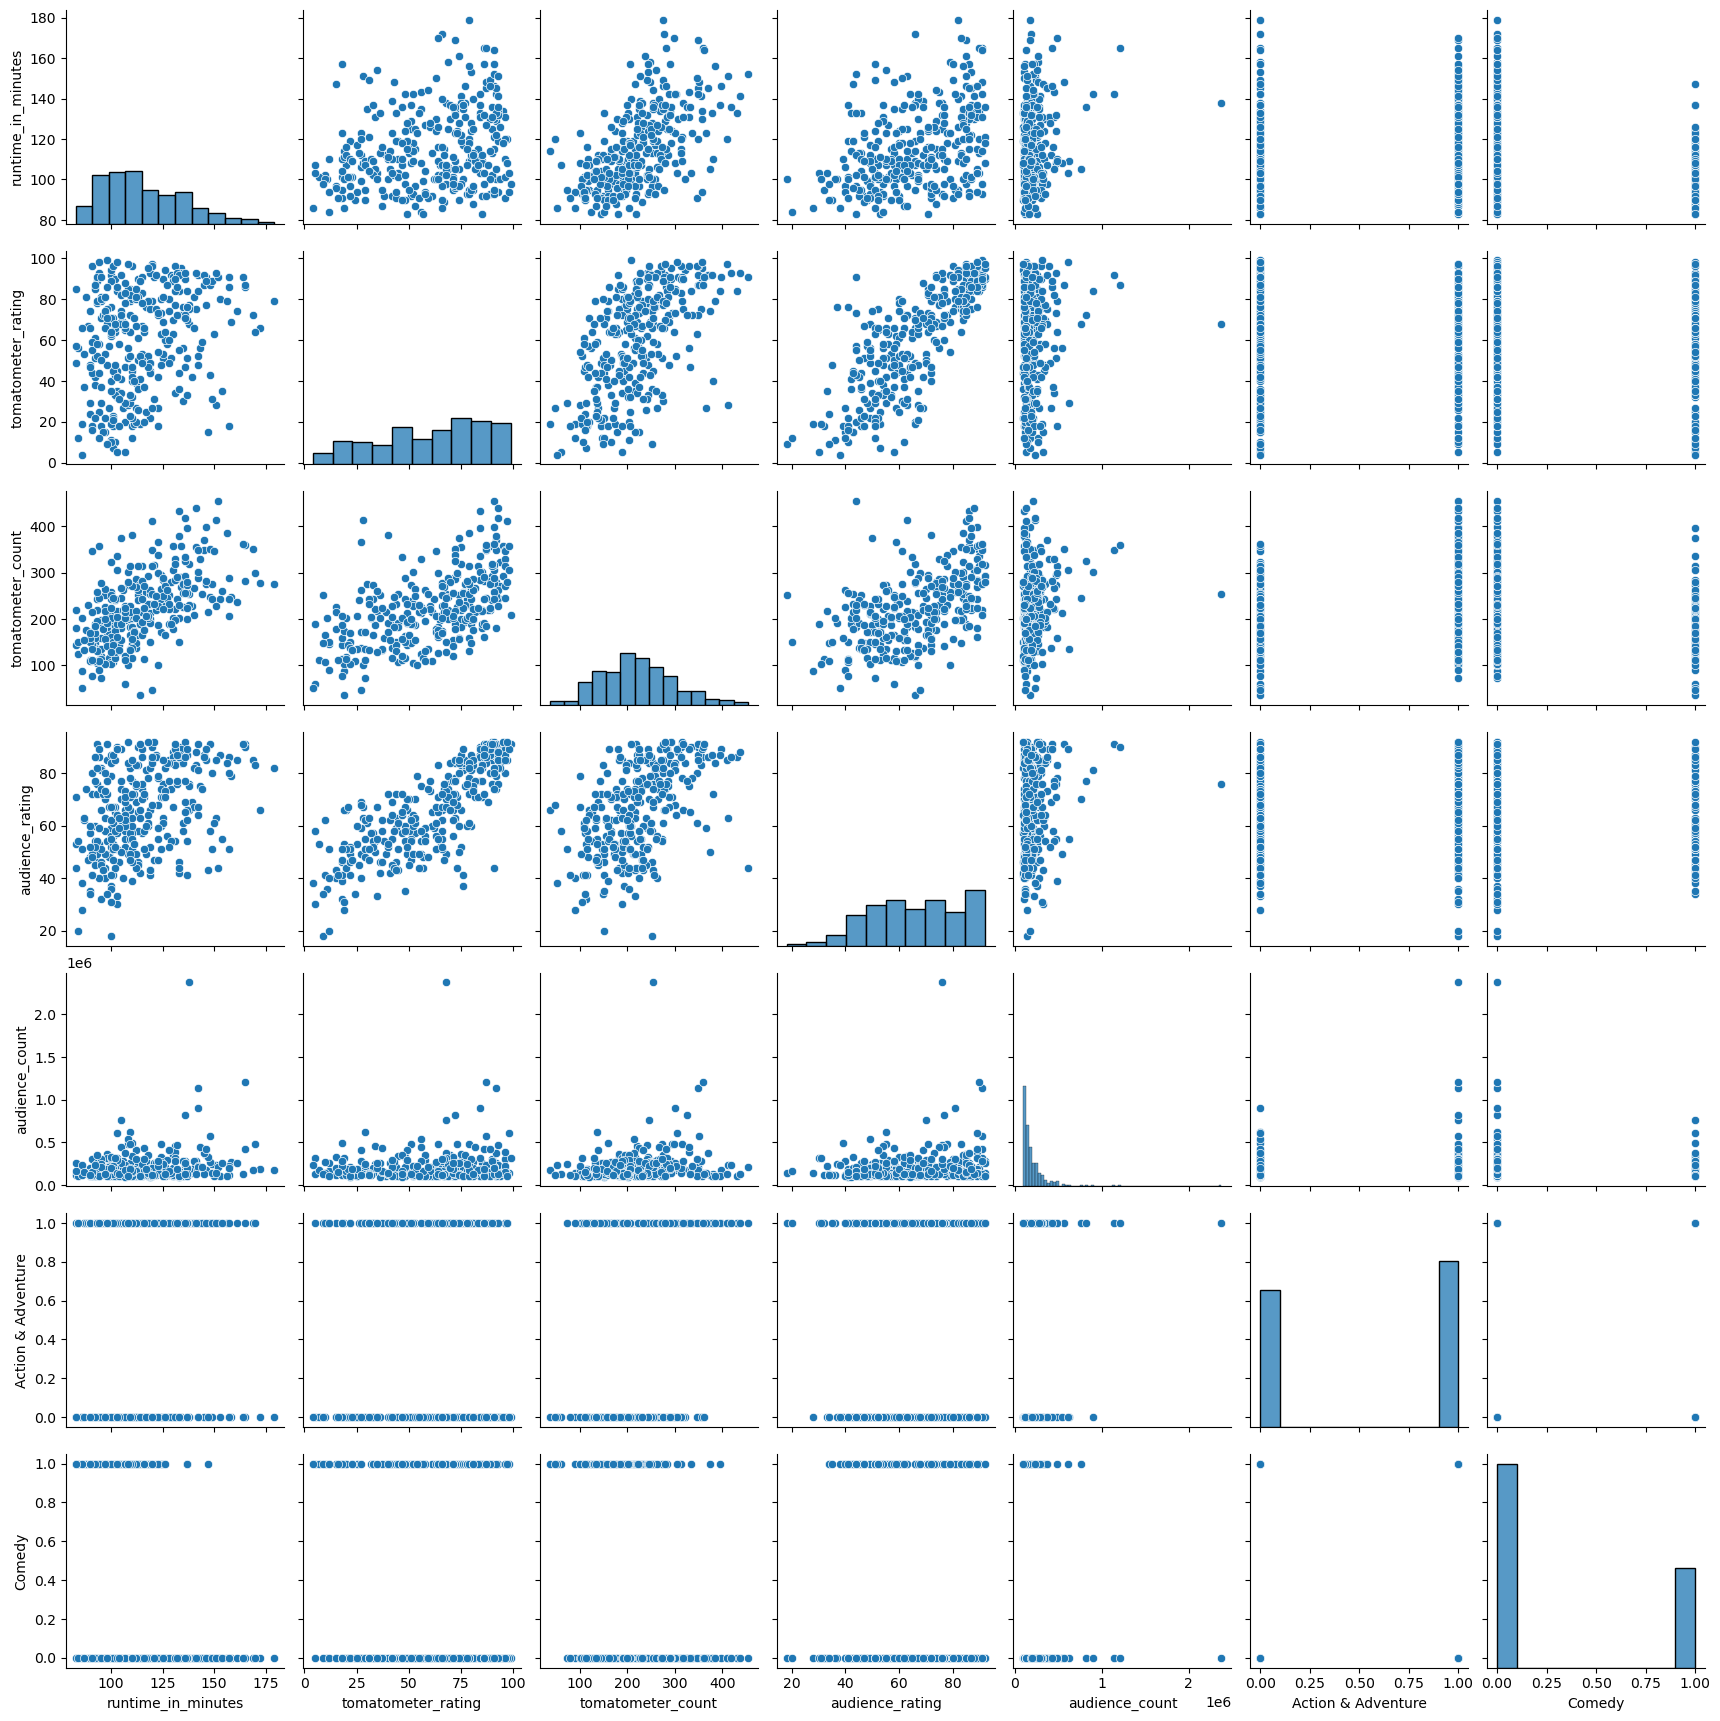

In [66]:
import seaborn as sns
sns.pairplot(movies_popular);

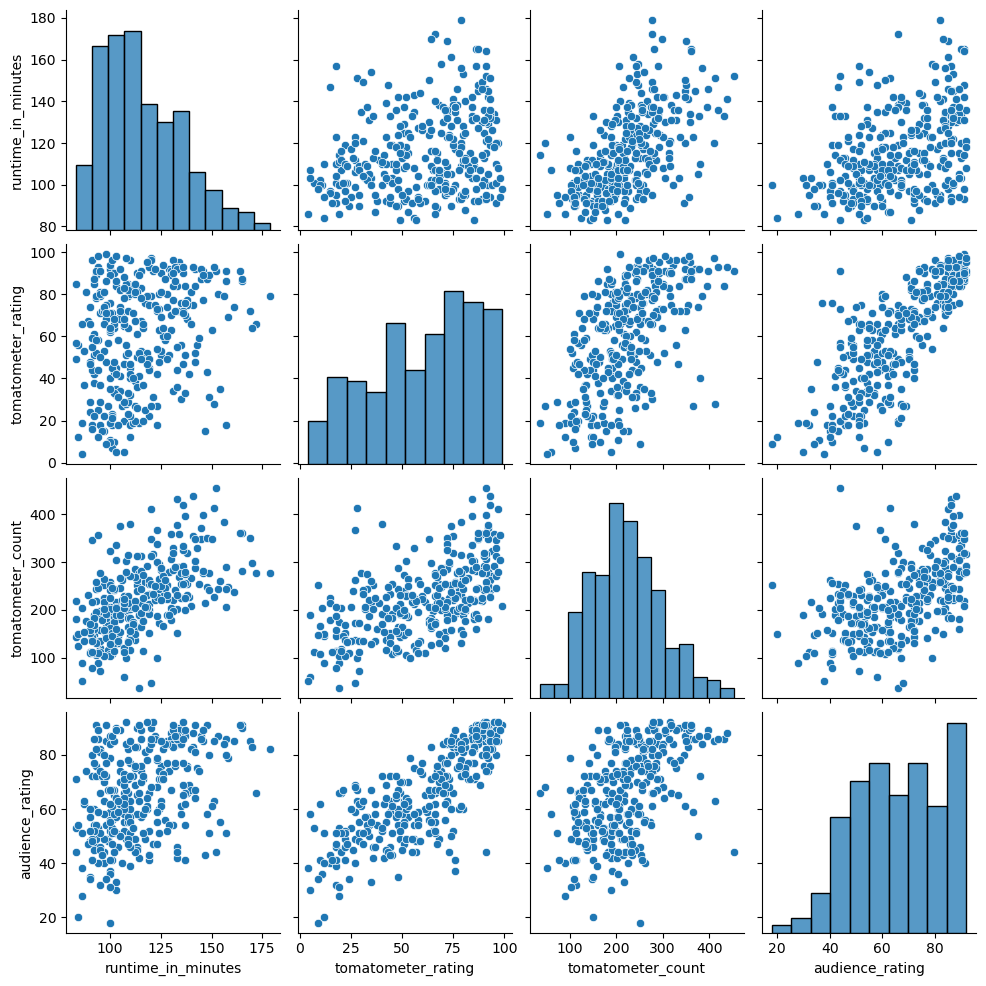

In [67]:
fig = sns.pairplot(movies_popular.iloc[:,:-3]);
fig.savefig('pairplot.png')

## Insights:

* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?

In [71]:
movies_popular[movies_popular.audience_count > 1e6]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Comedy
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,1,0
9581,Marvel's The Avengers,PG-13,"Action & Adventure, Science Fiction & Fantasy",2012-05-04,142.0,92,348,91.0,1134955.0,1,0
13936,The Dark Knight Rises,PG-13,"Action & Adventure, Drama, Mystery & Suspense",2012-07-20,165.0,87,360,90.0,1210957.0,1,0
